In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import io
from seaborn import despine

In [54]:
datafolder = '/Users/rdgao/Documents/data/Muotri/Jason/2020_04_08_thal_orgs_EF_5min_2Vpp_10Hz/'
data_pre = io.loadmat(datafolder+'pre/summary.mat', squeeze_me=True)
data_post = io.loadmat(datafolder+'post/summary.mat', squeeze_me=True)
wells = data_pre['wells']-1

In [65]:
def plot_comp_ts(data_pre, data_post, wells, feat_x, feat_y, XL, YL, plot_dim):
    for i_w, well in enumerate(wells):
        plt.subplot(plot_dim[0],plot_dim[1],i_w+1)
        plt.plot(data_pre[feat_x], data_pre[feat_y][well,:], 'k', alpha=0.8)
        plt.plot(data_post[feat_x], data_post[feat_y][well,:], 'r', alpha=0.5)
        plt.xlim(XL); plt.ylim(YL)
        plt.xticks(plt.xlim()); plt.yticks(plt.ylim())

    plt.tight_layout(); despine()
    

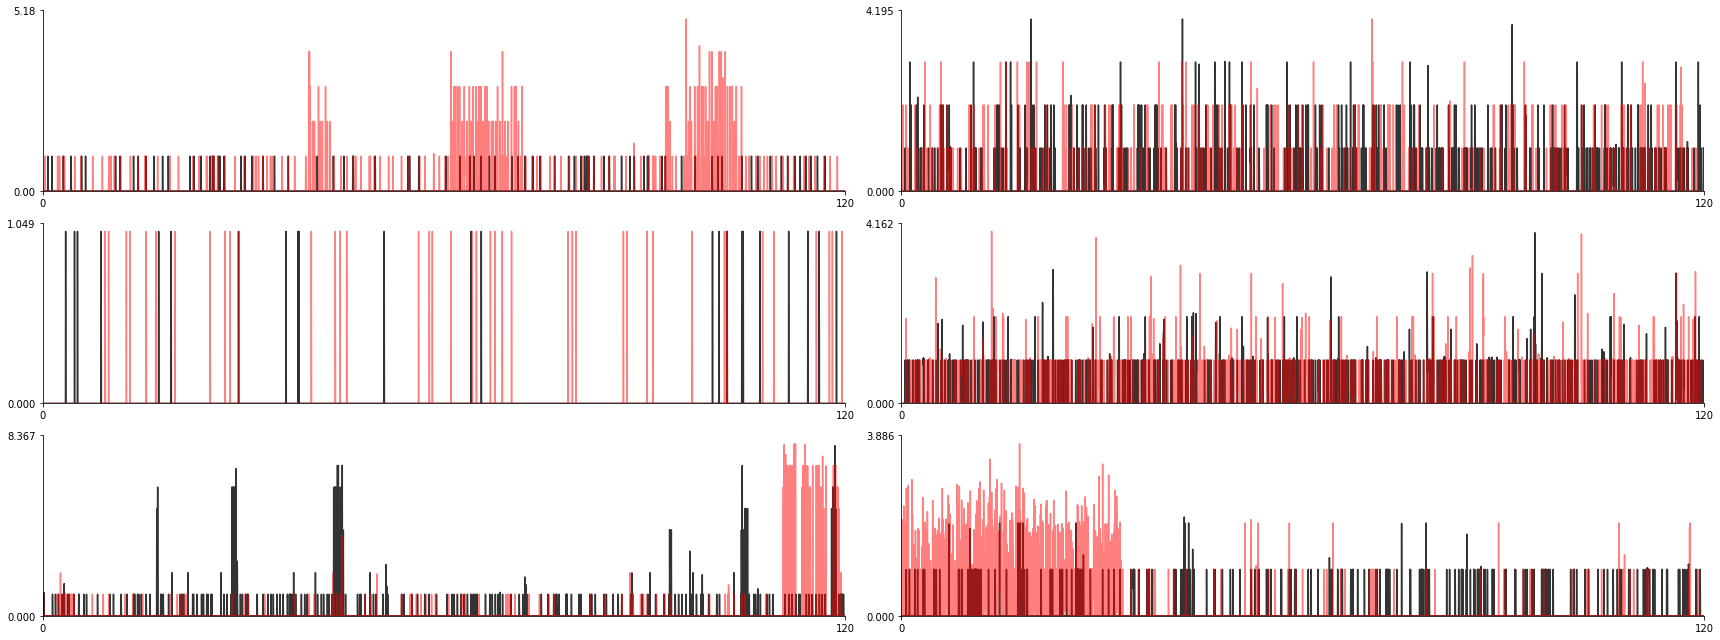

In [68]:
plt.figure(figsize=(24,9))
plot_comp_ts(data_pre, data_post, wells, 't_ds', 'nws_smo', [0,120], [0,None], [3,2])

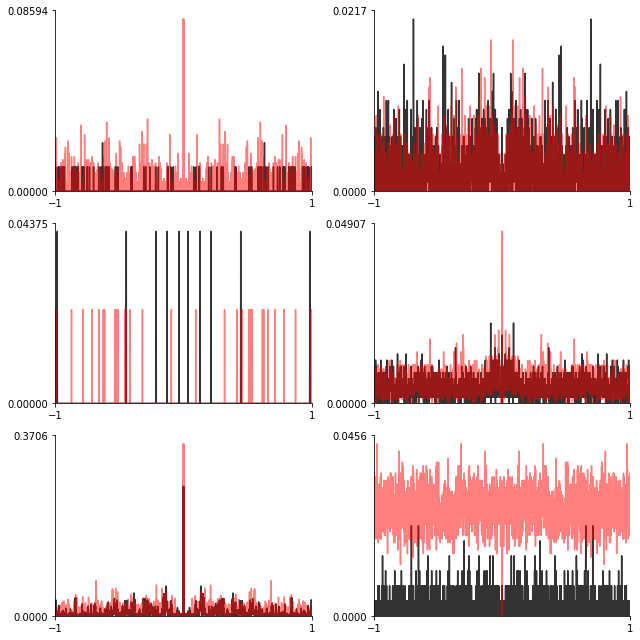

In [73]:
plt.figure(figsize=(9,9))
plot_comp_ts(data_pre, data_post, wells, 't_ac', 'ac', [-1,1], [0, None], [3,2])